1. Get a main results graph ✓
    1. Double-check the discretionary passing years
2. Get graphs by state
3. Prepare main results table
4. Prepare dynamic results table
4. Prepare dynamic results graph
5. Prepare age-based results table
6. Test any cause-related results
7. Go over paper
    1. Change results, conclusions and intro
    2. There are a few additional works to cite in https://www.preventdvgunviolence.org/dv-and-firearms-zeoli.pdf
    3. Explain identification strategy better
8. Go over paper again

In [1]:
import re
import numpy as np
import pandas as pd

import seaborn
from matplotlib import ticker

# Load Data

## Load Mortality Data

In [2]:
mortality_by_state = pd.read_stata('../processed_data/mortality_by_state_v3.5.dta')
del mortality_by_state['index']
mortality_by_state = mortality_by_state.query("not staters in(['ZZ', 'PR', 'VI', 'GU', 'AS'])")

In [8]:
with pd.option_context('max_rows', None):
    display(mortality_by_state.sample(5).T)

,1830,1049,1212,805,15
staters,IL,LA,MS,MT,IN
total_deaths,98247,35795,23980,6132,46172
total_pop,9.01806e+06,2.85463e+06,1.78697e+06,558528,3.12402e+06
male_deaths,47131,18594,12677,3383,25708
female_deaths,51116,17201,11303,2749,20464
pop_male,4.34402e+06,1.338e+06,830539,273269,1.47871e+06
pop_female,4.67404e+06,1.51663e+06,956429,285259,1.64531e+06
male_white_deaths,39682,12679,8419,3381,24097
male_black_deaths,7449,5915,4258,2,1611
female_white_deaths,43580,11882,7568,2746,19241


## Load Codification Data

In [9]:
with open('../treatment/mand_n_rec.do') as treatment_file:
    laws_in_states = []
    for line in treatment_file.readlines():
        m = re.match(r'^local law ([a-z_]+)$', line)
        if m:
            law = m[1]
        if law:
            m = re.match(r'^replace.*([A-Z]{2}).*([0-9]{4})', line)
            if m:
                state = m[1]
                year_of_passing = int(m[2])
                laws_in_states.append((state, law, year_of_passing))
    print(len(laws_in_states))
laws_in_states = pd.DataFrame(laws_in_states, columns=['state', 'law', 'year_of_passing'])
display(laws_in_states)
assert len(laws_in_states) >= 51

55


,state,law,year_of_passing
0,AL,discretionary,1989
1,AZ,discretionary,1991
2,DE,discretionary,1984
3,FL,discretionary,1992
4,GA,discretionary,1981
5,HI,discretionary,1980
6,ID,discretionary,1979
7,IN,discretionary,2000
8,IA,discretionary,1986
9,KY,discretionary,1980


## Merge

In [10]:
mortality_by_state_with_treatment = mortality_by_state.merge(laws_in_states, how='left', left_on='staters', right_on='state')
mortality_by_state_with_treatment['years_after_passing'] = mortality_by_state_with_treatment['year'] - mortality_by_state_with_treatment['year_of_passing']
mortality_by_state_with_treatment[['staters', 'year', 'years_after_passing']]

,staters,year,years_after_passing
0,AK,1969,-27
1,AL,1969,-20
2,AR,1969,-22
3,AZ,1969,-22
4,AZ,1969,-22
...,...,...,...
1967,VT,2004,19
1968,WA,2004,9
1969,WI,2004,15
1970,WV,2004,10


# Set the Main Variable of Interest

In [11]:
population_of_interest = 'female_black'

# Get a main results graph

In [14]:
# graph_data = mortality_by_state_with_treatment[(mortality_by_state_with_treatment['years_after_passing'] >= -5) & (mortality_by_state_with_treatment['years_after_passing'] <= 10)].copy()

# seaborn.lineplot(x='years_after_passing',
#                  y=population_of_interest + '_mortality_rate',
#                  ci=None,
#                  hue='law',
#                  data=graph_data)

In [15]:
years_before = -10
years_after = 10

In [16]:
def get_results_graph(population_of_interest, years_before, years_after, title):
    mortality_rate_by_state_with_treatment = mortality_by_state_with_treatment.copy()
    mortality_rate_by_state_with_treatment[population_of_interest + '_mortality_rate'] = \
        100000 * \
        mortality_rate_by_state_with_treatment[population_of_interest + '_deaths'] / mortality_rate_by_state_with_treatment['pop_' + population_of_interest]

    baseline_mortality = mortality_rate_by_state_with_treatment[(mortality_rate_by_state_with_treatment['years_after_passing'] < 0) & (mortality_rate_by_state_with_treatment['years_after_passing'] >= years_before)]\
        .groupby('state')[population_of_interest + '_mortality_rate']\
        .mean()\
        .to_frame()\
        .rename(columns={population_of_interest + '_mortality_rate': population_of_interest + '_baseline_mortality_rate'})\
        .reset_index()
    
    mortality_rate_by_state_with_treatment_and_baseline = mortality_rate_by_state_with_treatment.merge(baseline_mortality, how='left', on='state')
    mortality_rate_by_state_with_treatment_and_baseline['percent_change_in_mortality'] = \
        mortality_rate_by_state_with_treatment_and_baseline[population_of_interest + '_mortality_rate'] \
        / mortality_rate_by_state_with_treatment_and_baseline[population_of_interest + '_baseline_mortality_rate'] - 1
    
    
    graph_data = mortality_rate_by_state_with_treatment_and_baseline[mortality_rate_by_state_with_treatment_and_baseline['years_after_passing'].between(years_before, years_after)].copy()

    ax = seaborn.lineplot(x='years_after_passing',
                          y='percent_change_in_mortality',
                          ci=None,
                          style='law',
                          style_order=['mand_n_rec', 'discretionary'],
                          data=graph_data)
    ax.figure.set_figwidth(14)
    ax.figure.set_figheight(7)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{0:.0f}%'.format(y * 100)))
    x_axis_ticks = [int(tick) for tick in np.arange(*ax.get_xlim()) if tick % 2 == 0]
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_axis_ticks))
    ax.set_title(title, fontsize=18)
    ax.set_ylabel('Mortality Rate', fontsize=16)
    ax.set_xlabel('Years After the Law Passing', fontsize=12)
    ax.axvline(linestyle=':')
    ax.yaxis.grid(which='major', linestyle=':', color='b')
    legend_mapping = {'law': 'Arrest Law in State', 'mand_n_rec': 'Mandatory & Recommended', 'discretionary': 'Discretionary'}
    for txt in ax.legend().texts:
        txt.set_text(legend_mapping[txt.get_text()])

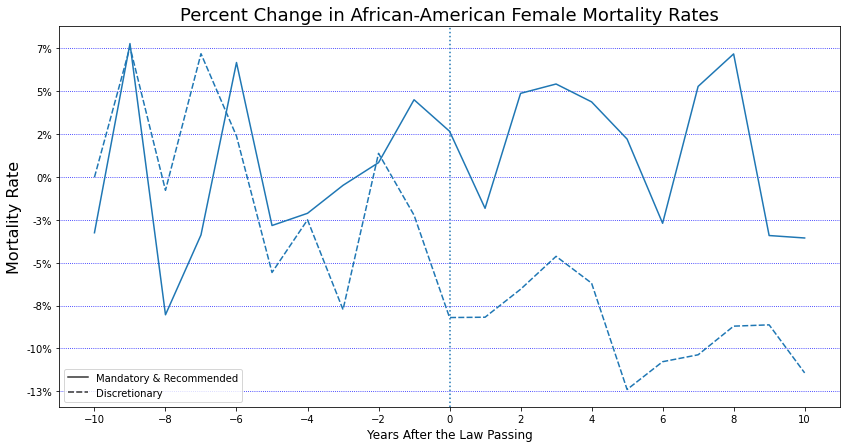

In [17]:
get_results_graph(
    'female_black', 
    years_before, 
    years_after,
    title='Percent Change in African-American Female Mortality Rates')

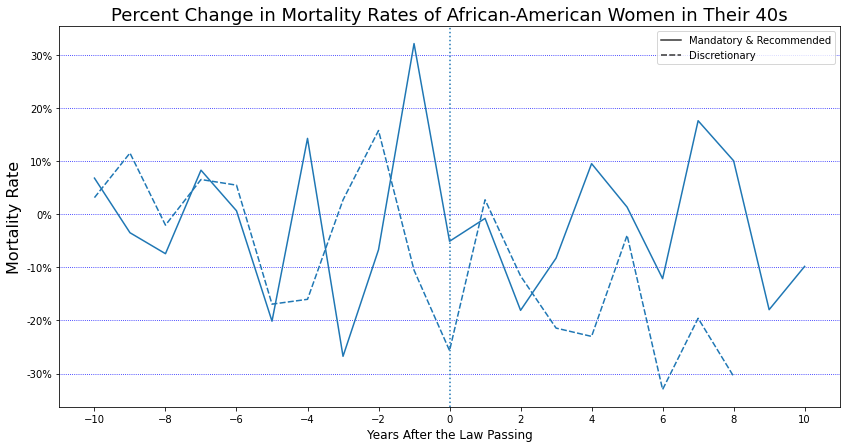

In [21]:
get_results_graph(
    'female_black_40s', 
    years_before, 
    years_after,
    title='Percent Change in Mortality Rates of African-American Women in Their 40s')

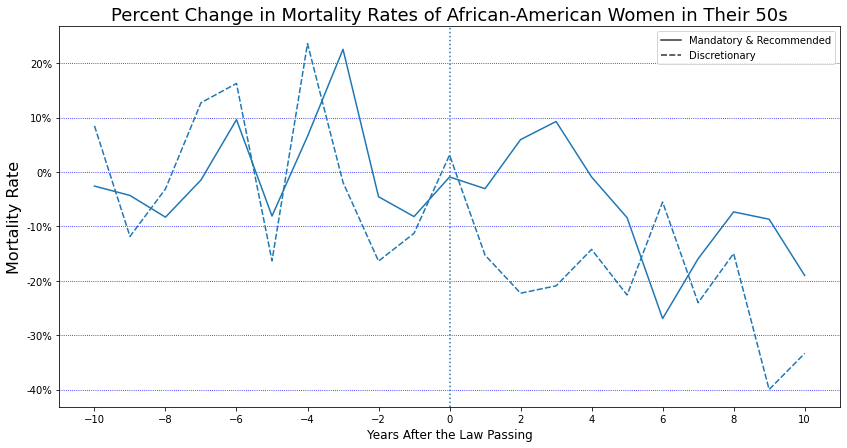

In [22]:
get_results_graph(
    'female_black_50s', 
    years_before, 
    years_after,
    title='Percent Change in Mortality Rates of African-American Women in Their 50s')